# Explore here

Import Libraries

In [270]:
import pandas as pd

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# split
from sklearn.model_selection import train_test_split

# modelado
from sklearn.linear_model import LogisticRegression

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# optimizacion
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [271]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=";")

print(df.head())
print(df.columns)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [273]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [274]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

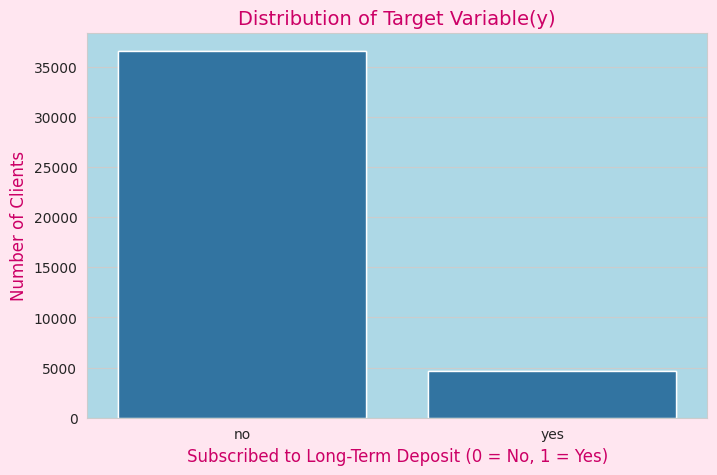

In [275]:

plt.figure(figsize=(8, 5), facecolor='#ffe6f0')
sns.countplot(data=df, x='y', hue='y', palette=['#ff66b2', '#ff99cc'], legend=False)


sns.countplot(data=df, x='y')
plt.title("Distribution of Target Variable(y)", fontsize=14, color='#cc0066')
plt.xlabel("Subscribed to Long-Term Deposit (0 = No, 1 = Yes)", fontsize=12, color='#cc0066')
plt.ylabel("Number of Clients", fontsize=12, color='#cc0066')

plt.gca().set_facecolor('lightblue')
plt.show()

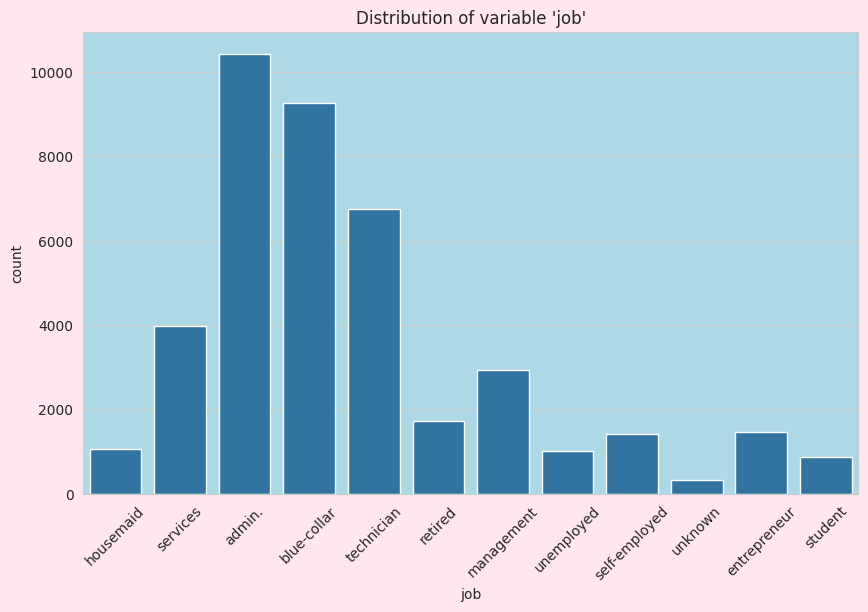

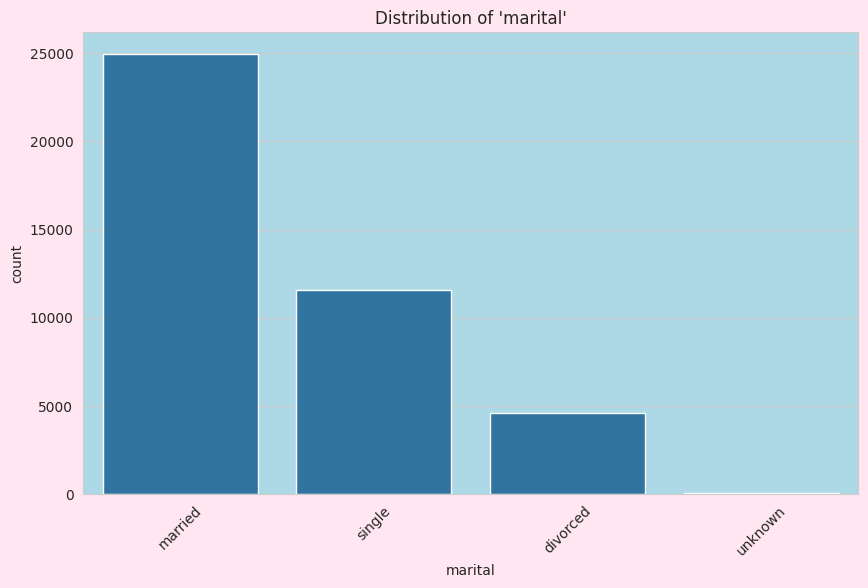

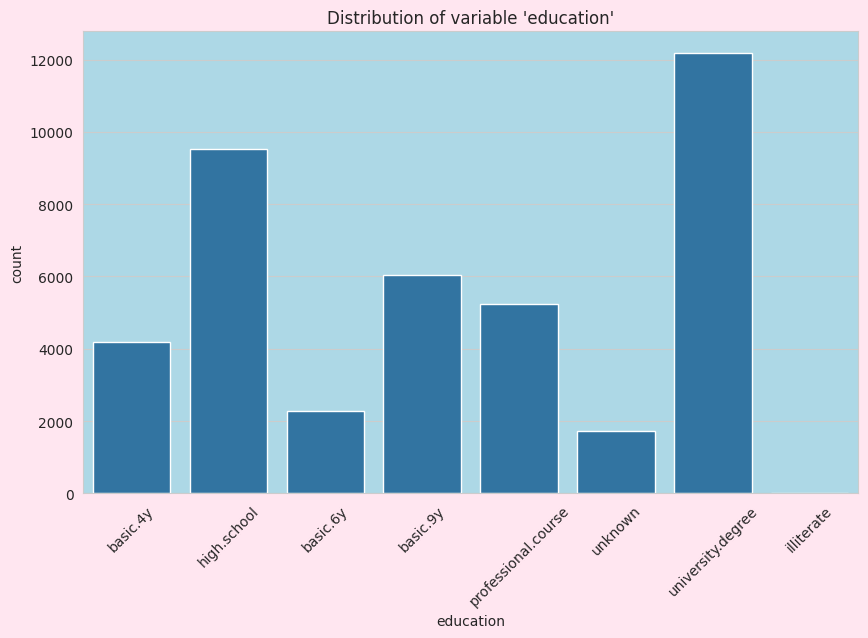

In [276]:

plt.figure(figsize=(10, 6), facecolor='#ffe6f0')
sns.countplot(data=df, x='job')
plt.title("Distribution of variable 'job'")
plt.xticks(rotation=45)

plt.gca().set_facecolor('lightblue')
plt.show()

# Visualization of variable 'marital'
plt.figure(figsize=(10,6), facecolor='#ffe6f0')
sns.countplot(data=df, x='marital')
plt.title("Distribution of 'marital'")
plt.xticks(rotation=45)
plt.gca().set_facecolor('lightblue')
plt.show()

# Visualization of variable  'education'
plt.figure(figsize=(10,6), facecolor='#ffe6f0')
sns.countplot(data=df, x='education')
plt.title("Distribution of variable 'education'")
plt.xticks(rotation=45)
plt.gca().set_facecolor('lightblue')
plt.show()


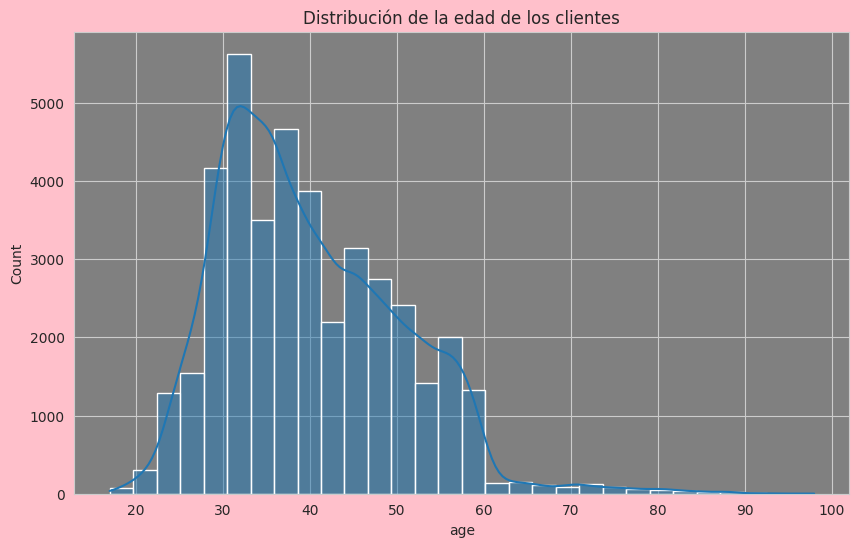

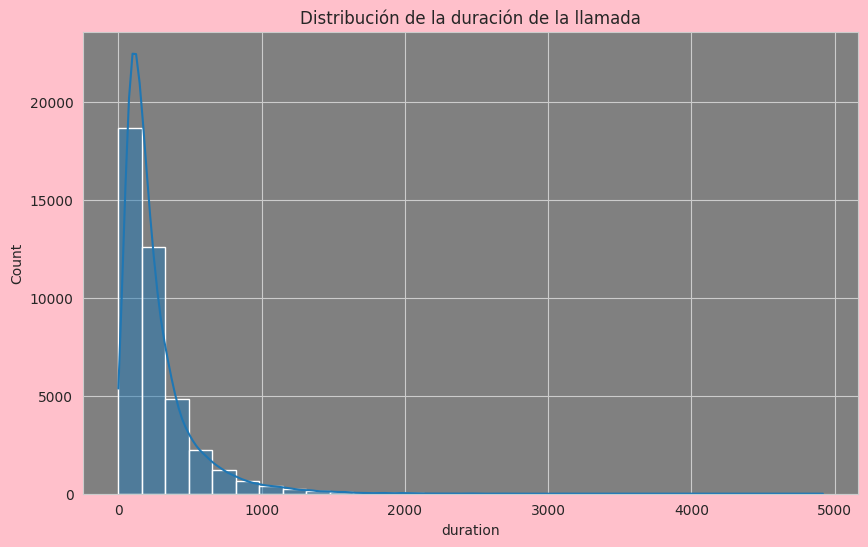

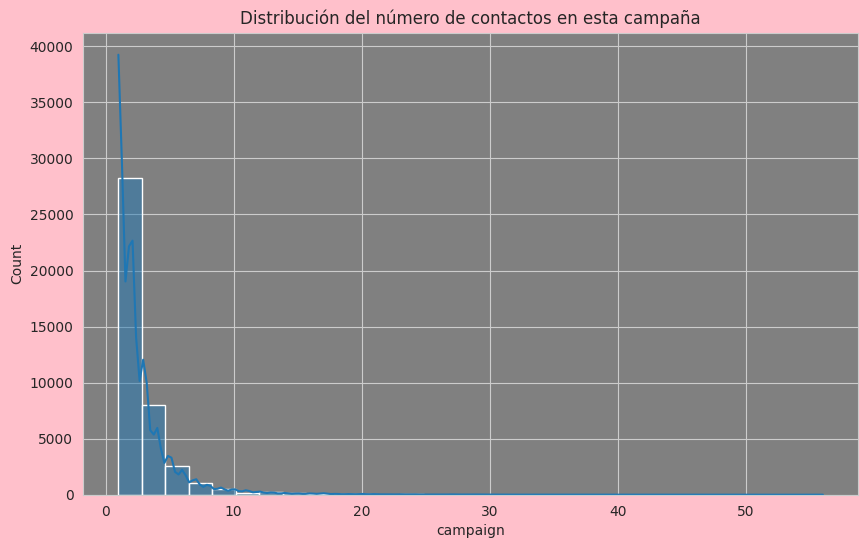

In [277]:
plt.figure(figsize=(10,6), facecolor='pink')
sns.histplot(df['age'], kde=True, bins=30)
plt.title("Distribución de la edad de los clientes")

plt.gca().set_facecolor('grey')
plt.show()

# Histograma de la variable 'duration' (duración de la llamada)
plt.figure(figsize=(10,6), facecolor='pink')
sns.histplot(df['duration'], kde=True, bins=30)
plt.title("Distribución de la duración de la llamada")
plt.gca().set_facecolor('grey')
plt.show()

# Histograma de la variable 'campaign'
plt.figure(figsize=(10,6), facecolor='pink')
sns.histplot(df['campaign'], kde=True, bins=30)
plt.title("Distribución del número de contactos en esta campaña")
plt.gca().set_facecolor('grey')
plt.show()



Data Cleaning & Preprocessing

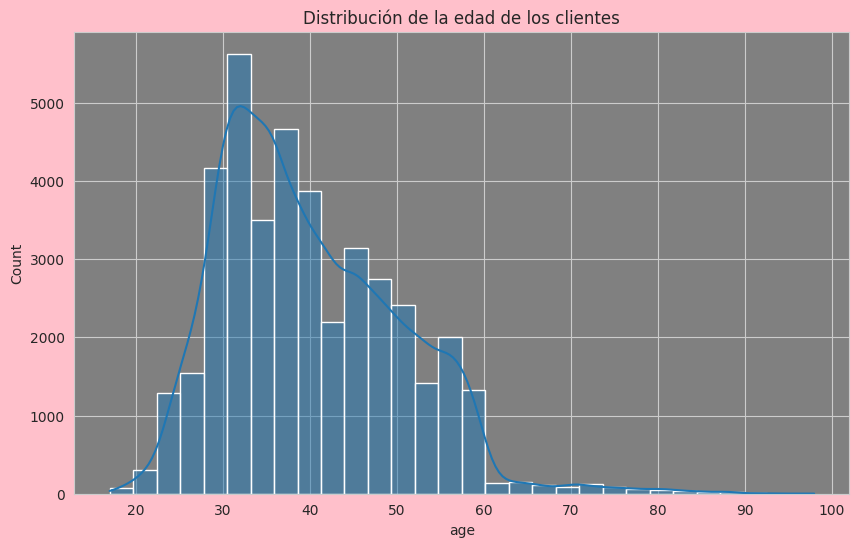

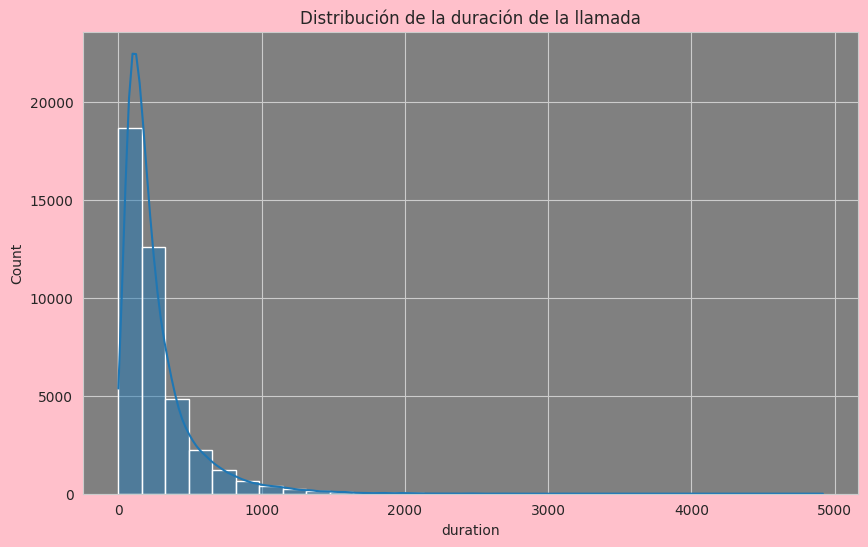

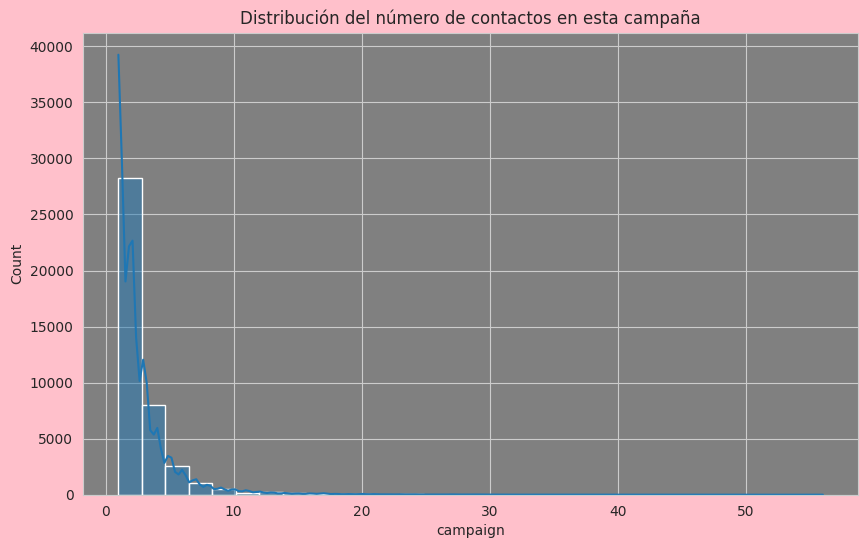

In [278]:
plt.figure(figsize=(10,6), facecolor='pink')
sns.histplot(df['age'], kde=True, bins=30)
plt.title("Distribución de la edad de los clientes")
plt.gca().set_facecolor('grey')
plt.show()

# Histograma de la variable 'duration' (duración de la llamada)
plt.figure(figsize=(10,6), facecolor='pink')
sns.histplot(df['duration'], kde=True, bins=30)
plt.title("Distribución de la duración de la llamada")
plt.gca().set_facecolor('grey')
plt.show()

# Histograma de la variable 'campaign'
plt.figure(figsize=(10,6), facecolor='pink')
sns.histplot(df['campaign'], kde=True, bins=30)
plt.title("Distribución del número de contactos en esta campaña")
plt.gca().set_facecolor('grey')
plt.show()

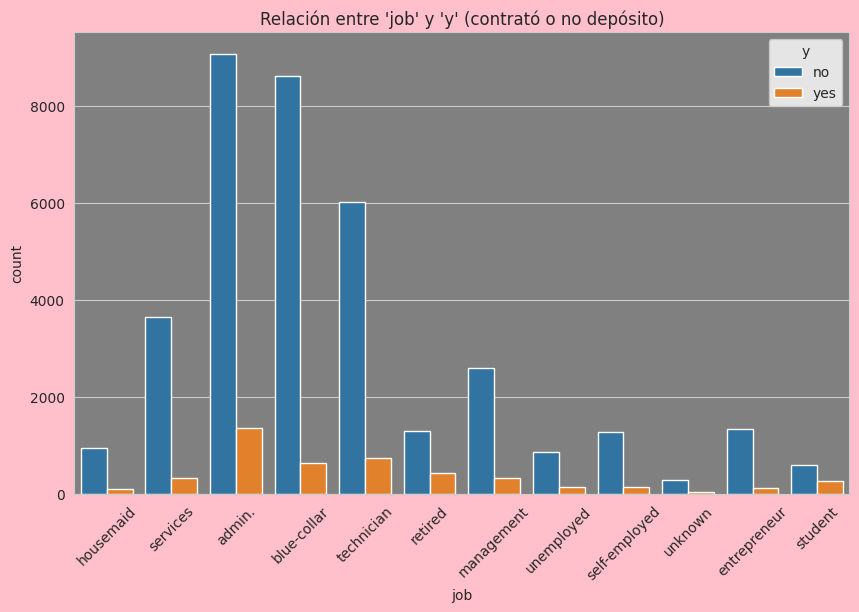

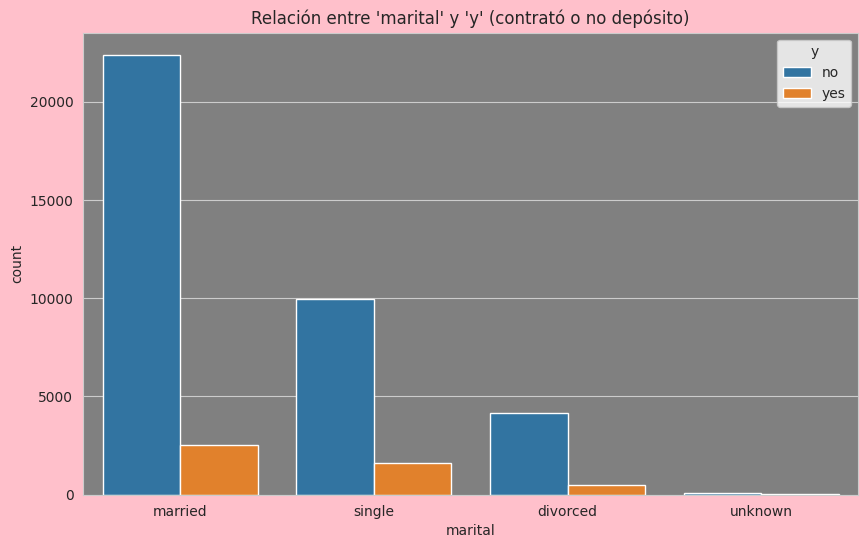

In [279]:
plt.figure(figsize=(10,6), facecolor='pink')
sns.countplot(data=df, x='job', hue='y')
plt.title("Relación entre 'job' y 'y' (contrató o no depósito)")
plt.xticks(rotation=45)

plt.gca().set_facecolor('grey')
plt.show()

# Relación entre la variable 'marital' y la variable objetivo 'y'
plt.figure(figsize=(10,6), facecolor='pink')
sns.countplot(data=df, x='marital', hue='y')
plt.title("Relación entre 'marital' y 'y' (contrató o no depósito)")

plt.gca().set_facecolor('grey')
plt.show()

Data Cleaning and Preprocessing

In [280]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

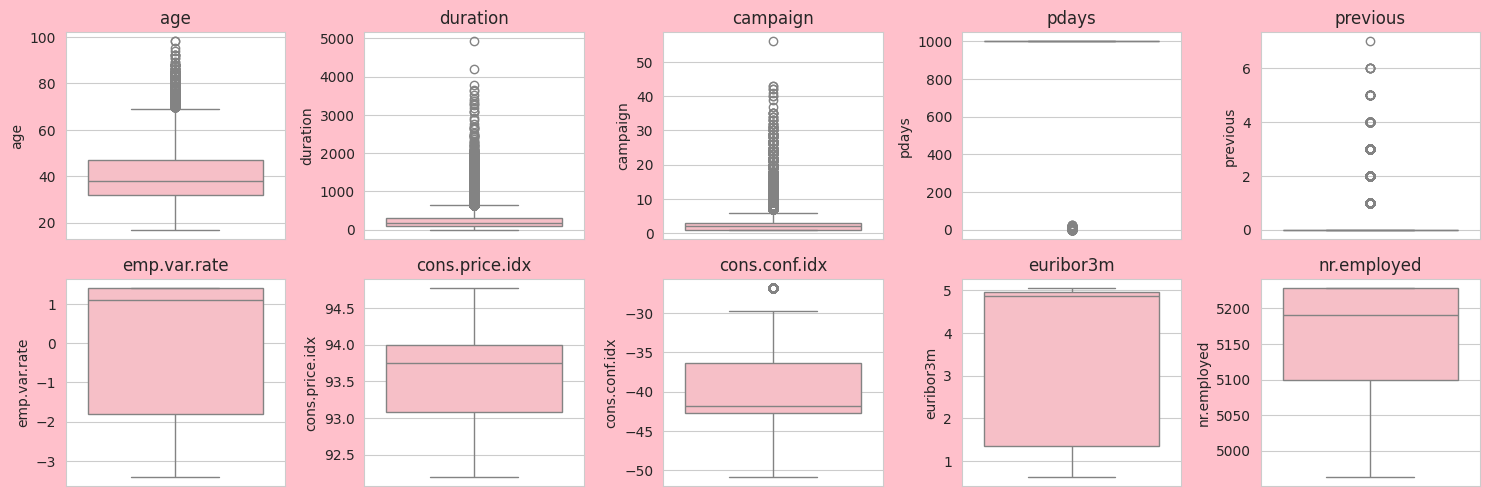

In [281]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10), facecolor='pink')
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=df, y=col, color="#ffb6c1")
    plt.title(col)
    plt.tight_layout()
plt.show()

In [282]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print(outliers.sum())

age                469
duration          2963
campaign          2406
pdays             1515
previous          5625
emp.var.rate         0
cons.price.idx       0
cons.conf.idx      447
euribor3m            0
nr.employed          0
dtype: int64


In [283]:
for col in ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    median = df[col].median()
    df[col] = np.where((df[col] < lower) | (df[col] > upper), median, df[col])

In [284]:

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['day_of_week'] = le.fit_transform(df['day_of_week'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])
print(df.head())

    age  job  marital  education  default  housing  loan  contact  month  \
0  56.0    3        1          0        0        0     0        1      6   
1  57.0    7        1          3        1        0     0        1      6   
2  37.0    7        1          3        0        2     0        1      6   
3  40.0    0        1          1        0        0     0        1      6   
4  56.0    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...       1.0  999.0       0.0         1           1.1   
1            1  ...       1.0  999.0       0.0         1           1.1   
2            1  ...       1.0  999.0       0.0         1           1.1   
3            1  ...       1.0  999.0       0.0         1           1.1   
4            1  ...       1.0  999.0       0.0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4    

In [285]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Creamos el codificador
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

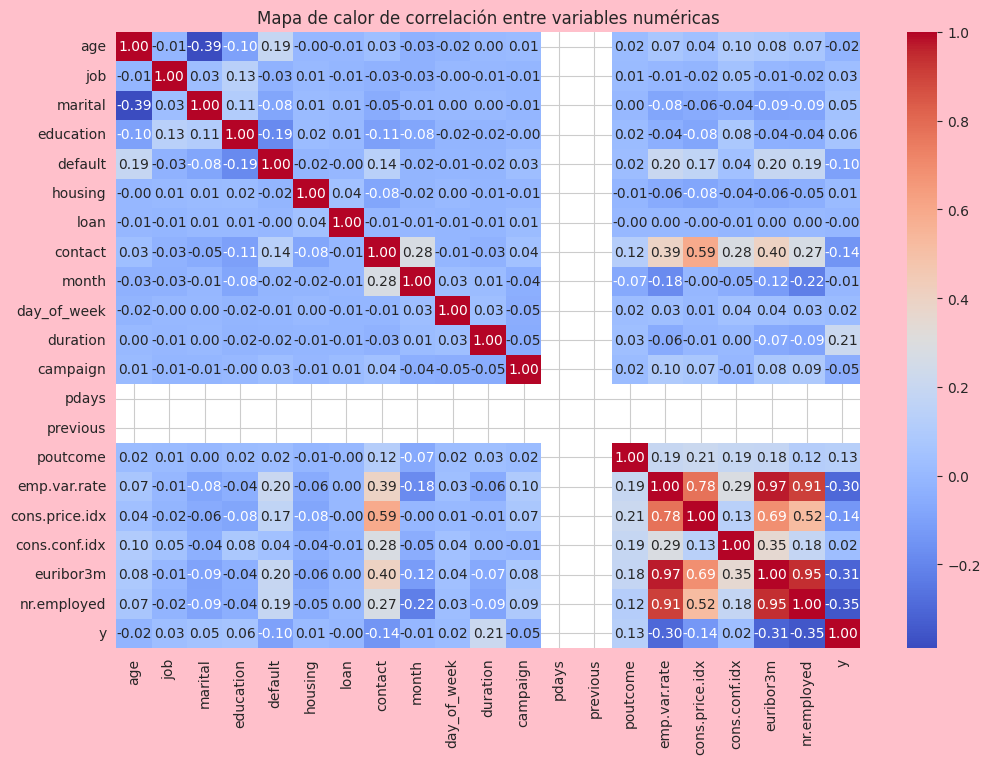

In [286]:
plt.figure(figsize=(12, 8), facecolor='pink')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de calor de correlación entre variables numéricas")
plt.show()

Feature Selection & Target Definition.

In [287]:
features = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week",
            "duration", "campaign", "pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
            "euribor3m", "nr.employed"] 

target = "y"  

X = df[features]  
y = df[target]   

Train-Test Split

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño total de los datos: {df.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño de la variable objetivo de entrenamiento (y_train): {y_train.shape}")

Tamaño total de los datos: (41188, 21)
Tamaño del conjunto de prueba (X_test): (8238, 20)
Tamaño del conjunto de entrenamiento (X_train): (32950, 20)
Tamaño de la variable objetivo de entrenamiento (y_train): (32950,)


Model training

In [289]:
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)


y_proba = model.predict_proba(X_test)  

threshold = 0.3
y_pred_threshold = np.where(y_proba[:, 1] > threshold, 1, 0) 

accuracy = accuracy_score(y_test, y_pred_threshold)
print(f"Precisión con umbral de 0.3: {accuracy}")

Precisión con umbral de 0.3: 0.8911143481427531


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [290]:
print(df['y'].value_counts())

y
0    36548
1     4640
Name: count, dtype: int64
